# 1. RGB

In [1]:
# !pip install gradio

In [2]:
# pip install gradio numpy scikit-learn matplotlib

In [3]:
import gradio as gr
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import colorsys
from skimage.color import rgb2lab

In [4]:
warm_tone = [255, 0, 0]  # 빨간색
cool_tone = [0, 0, 255]  # 파란색

def zero_shot_classification(color_vector):
    warm_similarity = np.dot(color_vector, warm_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(warm_tone))
    cool_similarity = np.dot(color_vector, cool_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(cool_tone))

    if warm_similarity > cool_similarity:
        return "웜톤"
    else:
        return "쿨톤"

In [5]:
def classify_image(image):
    image = image / 255.0  # 이미지를 0~1 범위로 정규화
    height, width, _ = image.shape
    colors = np.reshape(image, (height * width, 3))  # 이미지의 모든 픽셀을 1차원 벡터로 변환

    color_labels = []
    for color in colors:
        color_label = zero_shot_classification(color)
        color_labels.append(color_label)

    warm_tone_count = color_labels.count('웜톤')
    cool_tone_count = color_labels.count('쿨톤')

    warm_tone_ratio = warm_tone_count / len(color_labels) * 100
    cool_tone_ratio = cool_tone_count / len(color_labels) * 100

    return f"웜톤: {warm_tone_ratio:.2f}%\n쿨톤: {cool_tone_ratio:.2f}%"

In [6]:
# Gradio 인터페이스 설정
iface = gr.Interface(
    fn=classify_image,
    inputs="image",
    outputs="text",
    capture_session=True,
    title="웜톤 vs 쿨톤",
    description="사진을 업로드 하면 웜톤과 쿨톤의 비율을 확인할 수 있습니다."
)

iface.launch(share=True)

/tmp/ipykernel_79/785266313.py:2: GradioDeprecationWarning: `capture_session` parameter is deprecated, and it has no effect
  iface = gr.Interface(


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://ee7137578bbb10dec5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


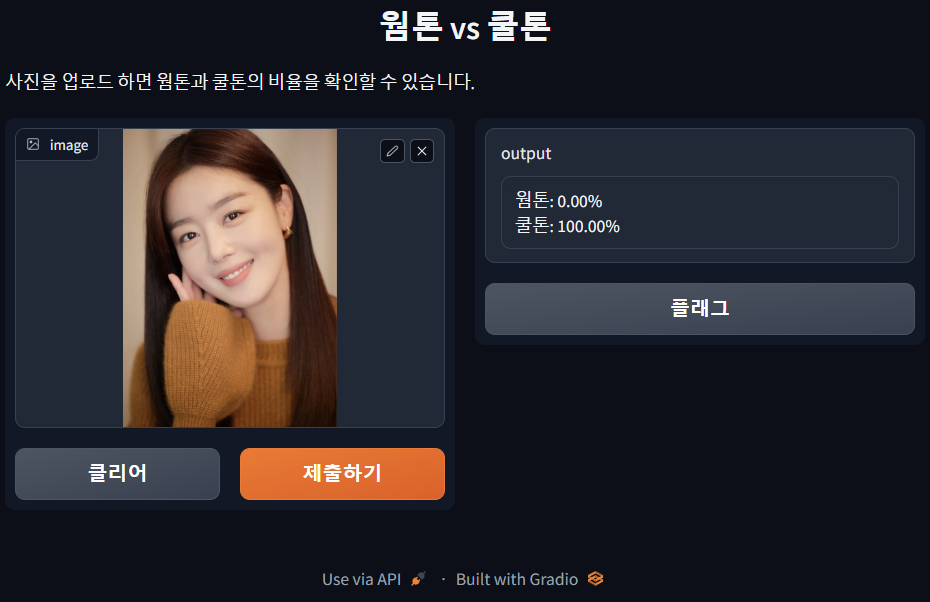

# 2. YCbCr

In [7]:
warm_tone = [235, 128, 16]  # 빨간색 (YCbCr로 변환한 값)
cool_tone = [95, 37, 180]   # 파란색 (YCbCr로 변환한 값)

In [8]:
# KNN 모델 생성
knn = KNeighborsClassifier(n_neighbors=1)  # 이웃의 개수를 1로 설정

def rgb_to_ycbcr(rgb):
    r = rgb[0]
    g = rgb[1]
    b = rgb[2]

    y = 0.299 * r + 0.587 * g + 0.114 * b
    cb = -0.169 * r - 0.331 * g + 0.5 * b + 128
    cr = 0.5 * r - 0.419 * g - 0.081 * b + 128

    return [y, cb, cr]

In [9]:
def zero_shot_classification(color_vector):
    ycbcr_color = rgb_to_ycbcr(color_vector)

    warm_similarity = np.dot(ycbcr_color, warm_tone) / (np.linalg.norm(ycbcr_color) * np.linalg.norm(warm_tone))
    cool_similarity = np.dot(ycbcr_color, cool_tone) / (np.linalg.norm(ycbcr_color) * np.linalg.norm(cool_tone))

    if warm_similarity > cool_similarity:
        return "웜톤"
    else:
        return "쿨톤"

In [10]:
def classify_image(image):
    image = image / 255.0  # 이미지를 0~1 범위로 정규화
    height, width, _ = image.shape
    colors = np.reshape(image, (height * width, 3))  # 이미지의 모든 픽셀을 1차원 벡터로 변환

    color_labels = []
    for color in colors:
        color_label = zero_shot_classification(color)
        color_labels.append(color_label)

    warm_tone_count = color_labels.count('웜톤')
    cool_tone_count = color_labels.count('쿨톤')

    warm_tone_ratio = warm_tone_count / len(color_labels) * 100
    cool_tone_ratio = cool_tone_count / len(color_labels) * 100

    return f"웜톤: {warm_tone_ratio:.2f}%\n쿨톤: {cool_tone_ratio:.2f}%"

In [11]:
# Gradio 인터페이스 설정
iface = gr.Interface(
    fn=classify_image,
    inputs="image",
    outputs="text",
    capture_session=True,
    title="웜톤 vs 쿨톤",
    description="사진을 업로드 하면 웜톤과 쿨톤의 비율을 확인할 수 있습니다."
)

iface.launch(share=True)

/tmp/ipykernel_79/785266313.py:2: GradioDeprecationWarning: `capture_session` parameter is deprecated, and it has no effect
  iface = gr.Interface(


Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://3cb79fb4f01629a24d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


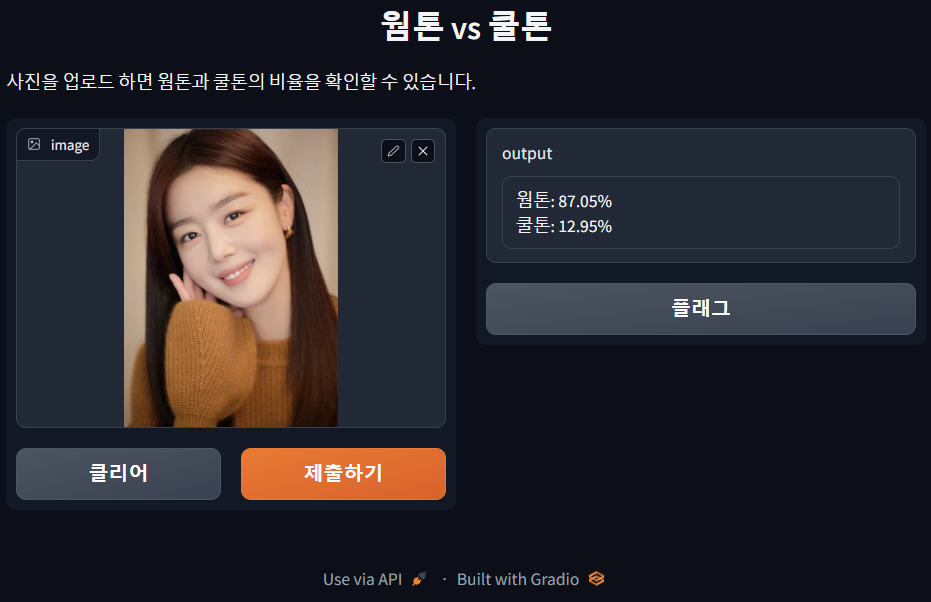

# 3. HSV

In [12]:
warm_tone = [0, 1, 1]      # 빨간색 (HSV로 변환한 값)
cool_tone = [0.666, 1, 1]  # 파란색 (HSV로 변환한 값)

In [13]:
def rgb_to_hsv(rgb):
    r = rgb[0] / 255.0
    g = rgb[1] / 255.0
    b = rgb[2] / 255.0

    h, s, v = colorsys.rgb_to_hsv(r, g, b)

    return [h, s, v]

In [14]:
def zero_shot_classification(color_vector):
    hsv_color = rgb_to_hsv(color_vector)

    warm_similarity = abs(hsv_color[0] - warm_tone[0])
    cool_similarity = abs(hsv_color[0] - cool_tone[0])

    if warm_similarity < cool_similarity:
        return "웜톤"
    else:
        return "쿨톤"

In [15]:
def classify_image(image):
    image = image / 255.0  # 이미지를 0~1 범위로 정규화
    height, width, _ = image.shape
    colors = np.reshape(image, (height * width, 3))  # 이미지의 모든 픽셀을 1차원 벡터로 변환

    color_labels = []
    for color in colors:
        color_label = zero_shot_classification(color)
        color_labels.append(color_label)

    warm_tone_count = color_labels.count('웜톤')
    cool_tone_count = color_labels.count('쿨톤')

    warm_tone_ratio = warm_tone_count / len(color_labels) * 100
    cool_tone_ratio = cool_tone_count / len(color_labels) * 100

    return f"웜톤: {warm_tone_ratio:.2f}%\n쿨톤: {cool_tone_ratio:.2f}%"

In [16]:
# Gradio 인터페이스 설정
iface = gr.Interface(
    fn=classify_image,
    inputs="image",
    outputs="text",
    capture_session=True,
    title="웜톤 vs 쿨톤",
    description="사진을 업로드 하면 웜톤과 쿨톤의 비율을 확인할 수 있습니다."
)

iface.launch(share=True)

/tmp/ipykernel_79/785266313.py:2: GradioDeprecationWarning: `capture_session` parameter is deprecated, and it has no effect
  iface = gr.Interface(


Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://1a81f0c0cb4c3bf4bc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


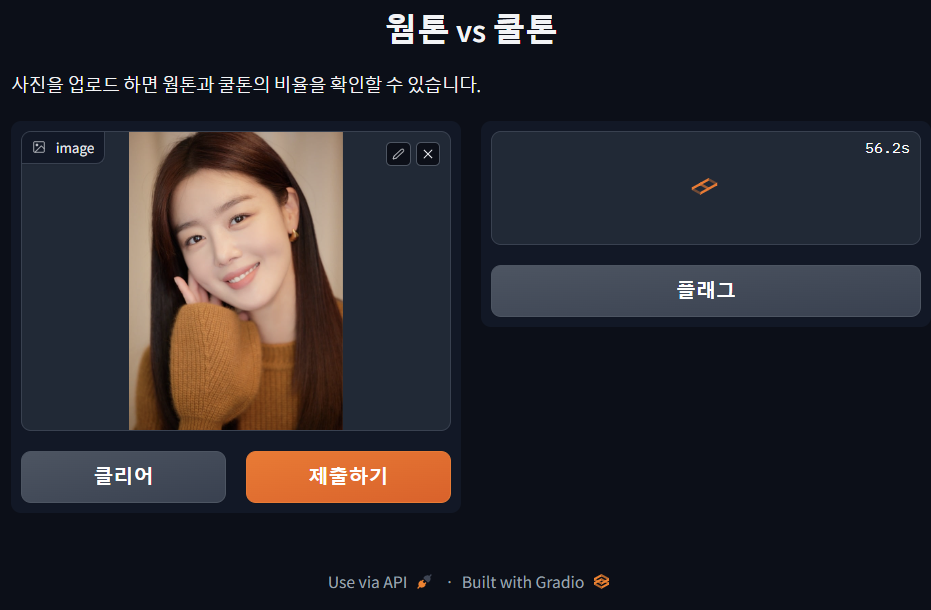

러닝타임이 사진 하나당 오래걸린다..

# 4.LAB

In [17]:
warm_tone = [70, 40, 60]   # 빨간색 (LAB로 변환한 값)
cool_tone = [10, -40, -60] # 파란색 (LAB로 변환한 값)

In [18]:
def rgb_to_lab(rgb):
    lab = rgb2lab([[rgb / 255.0]])[0][0]
    return lab[0], lab[1], lab[2]

def zero_shot_classification(color_vector):
    lab_color = rgb_to_lab(np.array(color_vector).astype(np.float32))

    warm_similarity = np.linalg.norm(lab_color - np.array(warm_tone).astype(np.float32))
    cool_similarity = np.linalg.norm(lab_color - np.array(cool_tone).astype(np.float32))

    if warm_similarity < cool_similarity:
        return "웜톤"
    else:
        return "쿨톤"

In [19]:
def classify_image(image):
    image = image.astype(np.float32) / 255.0  # 이미지를 0~1 범위로 정규화
    height, width, _ = image.shape
    colors = np.reshape(image, (height * width, 3))  # 이미지의 모든 픽셀을 1차원 벡터로 변환

    color_labels = []
    for color in colors:
        color_label = zero_shot_classification(color.astype(np.float32))
        color_labels.append(color_label)

    warm_tone_count = color_labels.count('웜톤')
    cool_tone_count = color_labels.count('쿨톤')

    warm_tone_ratio = warm_tone_count / len(color_labels) * 100
    cool_tone_ratio = cool_tone_count / len(color_labels) * 100

    return f"웜톤: {warm_tone_ratio:.2f}%\n쿨톤: {cool_tone_ratio:.2f}%"

In [20]:
iface = gr.Interface(
    fn=classify_image,
    inputs="image",
    outputs="text",
    capture_session=True,
    title="웜톤 vs 쿨톤",
    description="사진을 업로드 하면 웜톤과 쿨톤의 비율을 확인할 수 있습니다."
)

iface.launch(share=True)

/tmp/ipykernel_79/4139648043.py:1: GradioDeprecationWarning: `capture_session` parameter is deprecated, and it has no effect
  iface = gr.Interface(


Running on local URL:  http://127.0.0.1:7863
Running on public URL: https://5b6fc76b56e67bf59e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


LAB은 실행에 ERROR가 난다.